<a href="https://colab.research.google.com/github/PaprikaSteiger/CNN_GAN_tensorflow_vs_pytorch/blob/master/cnngan_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing a CNNGAN with tensorflow

## 1. Import and Preprocessing
### a) Importing modules

In [ ]:
# Load required packages - data handling & plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Load required packages - deep learning 
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(f"tensorflow: {tf.__version__}")
import sys
print(f"python: {sys.version[:5]}")

tensorflow: 2.4.1
python: 3.7.5


### b) Importing the data

In [ ]:
#download and save to file
#urllib.request.urlretrieve(
#    "https://media.githubusercontent.com/media/mmeierer/CNN---TensorFlow-vs-PyTorch/main/fashion-mnist_train.csv",
#    "fashion-mnist_train2.csv")

In [ ]:
train_data = pd.read_csv('https://media.githubusercontent.com/media/PaprikaSteiger/CNN_GAN_tensorflow_vs_pytorch/master/fashion-mnist_train.csv')

In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_images = train_data.iloc[:,1:]

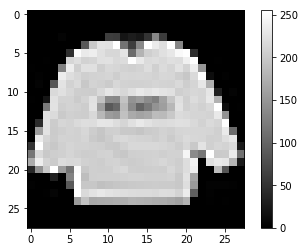

In [ ]:
plt.figure()
plt.imshow(train_images.values[0].reshape(28,28), cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

### c) Data preparation

In [ ]:
# use maximum normalization
train_images = train_images / np.float32(255)

In [ ]:
train_images.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0



## 2. Model specific data preparation (tensorflow)
## a) Load the data

In [ ]:
x_train_tf = tf.convert_to_tensor(train_images.values.reshape((-1, 28, 28, 1)))

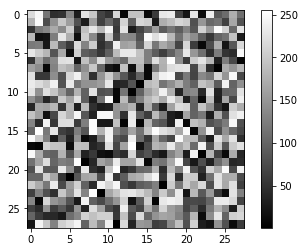

In [ ]:
# use random seed to create fake input data
seed = tf.random.uniform([28,28], 0, 1, tf.float32)
seed_im = seed.numpy() * 255
plt.figure()
plt.imshow(seed_im, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

### b) Tensor view of the data

In [ ]:
x_train_tf.shape

TensorShape([60000, 28, 28, 1])

In [ ]:
seed.shape

TensorShape([28, 28])

In [ ]:
x_train_tf[0][5]

<tf.Tensor: shape=(28, 1), dtype=float64, numpy=
array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18431373],
       [0.98823529],
       [0.91764706],
       [0.93333333],
       [0.87843137],
       [0.84313725],
       [0.84313725],
       [0.89803922],
       [0.42352941],
       [0.70588235],
       [0.81176471],
       [0.83921569],
       [0.87843137],
       [0.90588235],
       [0.97647059],
       [0.99607843],
       [0.17647059],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])>

## 3. Model definition

### a.1) Generator

In [ ]:
# for weight initialization
initializer_nn = tf.random_uniform_initializer(minval=-1, maxval=1, seed=123)
def generator_model():   
    model = tf.keras.Sequential()
    model.add(keras.layers.Conv2DTranspose(64, (7,7), input_shape=(1, 1, 100), strides=1, padding='valid', use_bias=True, name="Conv2D1"))
    model.add(keras.layers.BatchNormalization(name="Batchnorm1"))
    model.add(keras.layers.LeakyReLU(name="LeakyRelu1"))
    assert model.output_shape == (None, 7, 7, 64)

    model.add(keras.layers.Conv2DTranspose(32, (8, 8), strides=(1, 1), padding='valid', use_bias=True, name="Conv2D2"))
    assert model.output_shape == (None, 14, 14, 32)
    model.add(keras.layers.BatchNormalization(name="Batchnorm2"))
    model.add(keras.layers.LeakyReLU(name="LeakyRelu2"))

    model.add(keras.layers.Conv2DTranspose(1, (15, 15), strides=(1, 1), padding='valid', use_bias=True, name="Conv2D3"))
    model.add(keras.layers.Activation(keras.activations.sigmoid, name="Sigmoid1"))
    assert model.output_shape == (None, 28, 28, 1)

    return model
generator = generator_model()

In [ ]:
# generated image not trained
fake_im_not_trained = generator(tf.random.normal([1, 1, 1, 100], 0, 1, tf.float32))
fake_im_not_trained.shape

TensorShape([1, 28, 28, 1])

###  a.2) Inspect the generator model

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D1 (Conv2DTranspose)    (None, 7, 7, 64)          313664    
_________________________________________________________________
Batchnorm1 (BatchNormalizati (None, 7, 7, 64)          256       
_________________________________________________________________
LeakyRelu1 (LeakyReLU)       (None, 7, 7, 64)          0         
_________________________________________________________________
Conv2D2 (Conv2DTranspose)    (None, 14, 14, 32)        131104    
_________________________________________________________________
Batchnorm2 (BatchNormalizati (None, 14, 14, 32)        128       
_________________________________________________________________
LeakyRelu2 (LeakyReLU)       (None, 14, 14, 32)        0         
_________________________________________________________________
Conv2D3 (Conv2DTranspose)    (None, 28, 28, 1)         7

### a.3) Inspect the first convolutional layer

In [ ]:
hidden1_tf_ante = generator.layers[0]
weights_tf_ante, biases_tf_ante = hidden1_tf_ante.get_weights()
weights_tf_ante[0]

array([[[ 0.00818816, -0.02620516,  0.02036759, ...,  0.01204323,
          0.00610202,  0.02201682],
        [-0.02391763,  0.02131999,  0.00070359, ...,  0.01952383,
          0.02246807, -0.01560204],
        [-0.01141829, -0.01701246,  0.01193703, ...,  0.00519148,
         -0.00155846,  0.00474283],
        ...,
        [-0.00442488,  0.01612221, -0.00337991, ...,  0.00381619,
         -0.01455844,  0.0055977 ],
        [ 0.00553394, -0.02186662, -0.02667663, ...,  0.01062096,
          0.01947859, -0.02456287],
        [-0.01623891, -0.01207391,  0.02372267, ...,  0.01083844,
         -0.01966571, -0.00300002]],

       [[-0.00510514,  0.01830344, -0.02398565, ..., -0.02469217,
          0.01064975,  0.00221232],
        [ 0.02310055,  0.00585638, -0.00987964, ...,  0.02563565,
         -0.01795419,  0.00354412],
        [ 0.01457029, -0.0229919 , -0.02617645, ..., -0.01140226,
          0.01517211,  0.02703104],
        ...,
        [ 0.01194476,  0.0041151 , -0.02161013, ...,  

In [ ]:
weights_tf_ante[0].shape

(7, 64, 100)

In [ ]:
biases_tf_ante

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
biases_tf_ante.shape

(64,)

### b.1) Discriminator

In [ ]:
def discriminator_model():
    model = tf.keras.Sequential()
    model.add(keras.layers.Conv2D(input_shape=(28,28,1), filters=2, kernel_size=5, strides=1, padding="same", name="Conv2D1"))
    model.add(keras.layers.AveragePooling2D(pool_size=2, strides=2, name="Pooling1"))
    model.add(keras.layers.LeakyReLU(name="LeakyRelu1"))
    model.add(keras.layers.Dropout(0.3, name="Dropout1"))
    
    model.add(keras.layers.Conv2D(filters=2, kernel_size=5, strides=1, padding="same", name="Conv2D2"))
    model.add(keras.layers.LeakyReLU(name="LeakyRelu2"))
    
    model.add(keras.layers.Conv2D(filters=1, kernel_size=5, strides=1, name="conv2D3"))
    model.add(keras.layers.LeakyReLU(name="LeakyRelu3"))
    
    model.add(keras.layers.Flatten(name="Flatten1"))
    
    model.add(keras.layers.Dense(100, kernel_initializer=initializer_nn, name="Dense1"))
    model.add(keras.layers.LeakyReLU(name="LeakyRelu4"))
    
    model.add(keras.layers.Dense(64, kernel_initializer=initializer_nn, name="Dense2"))
    model.add(keras.layers.Activation(keras.activations.tanh, name="Tanh"))
    
    model.add(keras.layers.Dense(1, kernel_initializer=initializer_nn, name="Dense3"))
    model.add(keras.layers.Activation(keras.activations.sigmoid, name="Sigmoid"))
    return model
discriminator = discriminator_model()

### b.2) Inspect the discriminator model

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D1 (Conv2D)             (None, 28, 28, 2)         52        
_________________________________________________________________
Pooling1 (AveragePooling2D)  (None, 14, 14, 2)         0         
_________________________________________________________________
LeakyRelu1 (LeakyReLU)       (None, 14, 14, 2)         0         
_________________________________________________________________
Dropout1 (Dropout)           (None, 14, 14, 2)         0         
_________________________________________________________________
Conv2D2 (Conv2D)             (None, 14, 14, 2)         102       
_________________________________________________________________
LeakyRelu2 (LeakyReLU)       (None, 14, 14, 2)         0         
_________________________________________________________________
conv2D3 (Conv2D)             (None, 10, 10, 1)        

### b.3) Inspect the first convolutional layer

In [ ]:
hidden2_tf_ante = discriminator.layers[0]
weights2_tf_ante, biases2_tf_ante = hidden2_tf_ante.get_weights()
weights2_tf_ante[0]

array([[[-0.06161587, -0.20356922]],

       [[-0.20487273, -0.04940723]],

       [[ 0.22900972,  0.07100815]],

       [[-0.15138084,  0.11421856]],

       [[ 0.25061098, -0.16758902]]], dtype=float32)

In [ ]:
biases2_tf_ante

array([0., 0.], dtype=float32)

## 4. Loss & Optimizer

### 4.a) Generator loss

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits='activation')
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

### 4.b) Discriminator loss

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

## 4.c) Optimizers

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-3)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-3)

train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy') # only for discriminator

## 5. Training

In [ ]:
# for saving the model
import os
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
# This annotation causes the function to be "compiled".
#@tf.function
def train_step_tf(generator, discriminator, generator_optimizer, discriminator_optimizer, batch_size = 100):
    gen_losses = []
    disc_losses = []
    for beg_i in range(0, x_train_tf.shape[0], batch_size):
        x_train_batch_tf = x_train_tf[beg_i:beg_i + batch_size]

        x_fake_batch_tf = tf.random.normal([batch_size, 1, 1, 100], 0, 1, tf.float32)

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

            generated_images = generator( x_fake_batch_tf, training=True)
            real_output = discriminator(x_train_batch_tf, training=True)
            fake_output = discriminator(generated_images, training=True)

            gen_loss = generator_loss(fake_output)
            disc_loss = discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
        
        gen_losses.append(gen_loss)
        disc_losses.append(disc_loss)
        
        train_accuracy.update_state(tf.ones_like(real_output), real_output)
        train_accuracy.update_state(tf.zeros_like(fake_output), fake_output)
    return gen_losses, disc_losses

In [ ]:
train_losses_generator_tf = []
train_losses_discriminator_tf = []
train_acc_discriminator_tf = []
epochs = 15
start = time.time()
for epoch in range(epochs):
    gen_loss, disc_loss = train_step_tf(generator, discriminator, generator_optimizer, discriminator_optimizer)
    train_loss_generator_tf = float(tf.reduce_mean(gen_loss))
    train_loss_discriminator_tf = float(tf.reduce_mean(disc_loss))
    train_losses_generator_tf.append(train_loss_generator_tf)
    train_losses_discriminator_tf.append(train_loss_discriminator_tf)

    template = ("Epoch {}, Loss_Generator: {}, Loss_Discriminator: {}, Discriminator_Accuracy: {}")
    print(template.format(epoch+1, train_loss_generator_tf, train_loss_discriminator_tf, train_accuracy.result()*100))

    train_accuracy.reset_states()
end = time.time()
print(f"Total training time{start-end}")

Epoch 1, Loss_Generator: 1.3507462739944458, Loss_Discriminator: 1.461517095565796, Discriminator_Accuracy: 70.56417083740234
Epoch 2, Loss_Generator: 1.4563881158828735, Loss_Discriminator: 0.946139931678772, Discriminator_Accuracy: 77.63249969482422
Epoch 3, Loss_Generator: 1.3261306285858154, Loss_Discriminator: 1.0207077264785767, Discriminator_Accuracy: 74.81500244140625
Epoch 4, Loss_Generator: 1.7236814498901367, Loss_Discriminator: 0.8842008709907532, Discriminator_Accuracy: 79.79500579833984
Epoch 5, Loss_Generator: 1.2228353023529053, Loss_Discriminator: 1.0480560064315796, Discriminator_Accuracy: 74.12083435058594
Epoch 6, Loss_Generator: 1.2281293869018555, Loss_Discriminator: 1.042143702507019, Discriminator_Accuracy: 74.15249633789062
Epoch 7, Loss_Generator: 1.1982595920562744, Loss_Discriminator: 1.0808658599853516, Discriminator_Accuracy: 72.55999755859375
Epoch 8, Loss_Generator: 1.152327299118042, Loss_Discriminator: 1.119730830192566, Discriminator_Accuracy: 71.0874

### b) Training progress

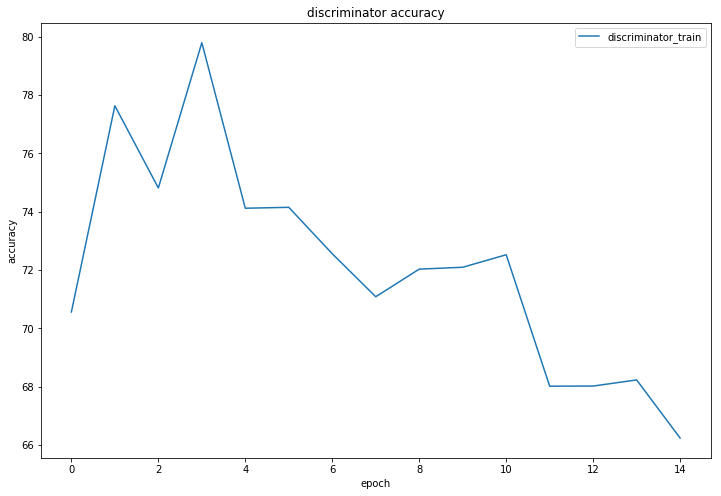

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train_acc_discriminator_tf)
plt.title('discriminator accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['discriminator_train'], loc='upper right')
plt.show()

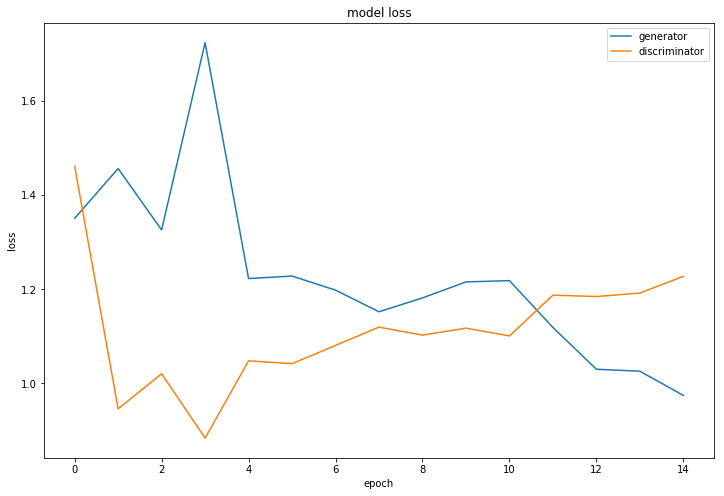

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train_losses_generator_tf)
plt.plot(train_losses_discriminator_tf)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['generator', 'discriminator'], loc='upper right')
plt.show()

In [ ]:
print(train_losses_generator_tf)
print(train_losses_discriminator_tf)

[1.3507462739944458, 1.4563881158828735, 1.3261306285858154, 1.7236814498901367, 1.2228353023529053, 1.2281293869018555, 1.1982595920562744, 1.152327299118042, 1.1817070245742798, 1.2157047986984253, 1.218414306640625, 1.1189746856689453, 1.030266523361206, 1.0261250734329224, 0.9747366309165955]
[1.461517095565796, 0.946139931678772, 1.0207077264785767, 0.8842008709907532, 1.0480560064315796, 1.042143702507019, 1.0808658599853516, 1.119730830192566, 1.1027510166168213, 1.1175553798675537, 1.100944995880127, 1.1876068115234375, 1.184654951095581, 1.1920344829559326, 1.2275789976119995]


### c1) Generator output before training

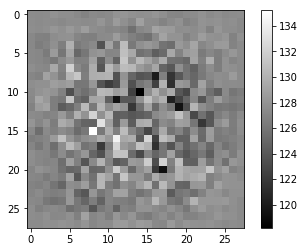

In [ ]:
fake_im_not_trained = fake_im_not_trained.numpy() * 255
fake_im_not_trained = fake_im_not_trained.reshape((28,28))
plt.figure()
plt.imshow(fake_im_not_trained, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

### c2) Generator output after training

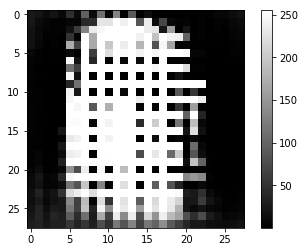

In [ ]:
seed2 = tf.random.uniform([1, 1, 1, 100], 0, 1, tf.float32)
fake_im = generator(seed2, training=False)
fake_im = fake_im.numpy() * 255
fake_im = fake_im.reshape((28,28))
plt.figure()
plt.imshow(fake_im, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()